In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import re
import random
from pyvi import ViTokenizer

In [2]:
filename='UIT-VSMEC/train_nor_811.xlsx'
data= pd.read_excel(filename,sheet_name='Sheet1')

In [3]:
filename='UIT-VSMEC/valid_nor_811.xlsx'
data1= pd.read_excel(filename,sheet_name='Sheet1')

In [4]:
data = data.append(data1, ignore_index=True, sort=False)

In [5]:
data[:10]

,Unnamed: 0,Emotion,Sentence
0,188,Other,cho mình xin bài nhạc tên là gì với ạ
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
5,1220,Anger,thằng kia sao mày bắt vợ với bồ tao dọn thế ki...
6,44,Other,một lí do trog muôn vàn lí do
7,1951,Surprise,thật hay đùa ác vậy . không thể tin được
8,1249,Anger,"ko phải con mình , mà xem còn thấy đau như vậy..."
9,1063,Sadness,per nghe đi rồi khóc 1 trận cho thoải mái . đừ...


<BarContainer object of 7 artists>

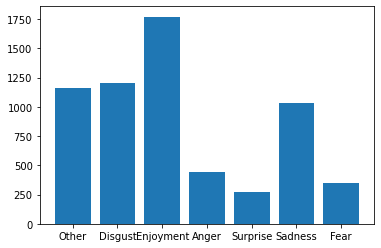

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

w=Counter(data['Emotion'])
plt.bar(w.keys(), w.values())

In [7]:
data=data.drop('Unnamed: 0',axis=1)

In [8]:
data['Emotion'].replace({'Other':0,'Disgust':1,'Enjoyment':2,'Anger':3,'Surprise':4,'Sadness':5,'Fear':6},inplace=True)

In [9]:
enjo_sent=data.loc[data.Emotion==2,'Sentence'].tolist()
other_sent=data.loc[data.Emotion==0,'Sentence'].tolist()
other_len = len(enjo_sent) - len(other_sent)
disg_sent=data.loc[data.Emotion==1,'Sentence'].tolist()
disg_len = len(enjo_sent) - len(disg_sent)
ange_sent=data.loc[data.Emotion==3,'Sentence'].tolist()
ange_len = len(enjo_sent) - len(ange_sent)
surp_sent=data.loc[data.Emotion==4,'Sentence'].tolist()
surp_len = len(enjo_sent) - len(surp_sent)
sadn_sent=data.loc[data.Emotion==5,'Sentence'].tolist()
sadn_len = len(enjo_sent) - len(sadn_sent)
fear_sent=data.loc[data.Emotion==6,'Sentence'].tolist()
fear_len = len(enjo_sent) - len(fear_sent)

In [10]:
def fill_up(data,length):
    for i in range (0,length):
        rand_sent=random.choice(data)
        data.append(rand_sent)

In [11]:
fill_up(other_sent,other_len)
fill_up(disg_sent,disg_len)
fill_up(ange_sent,ange_len)
fill_up(surp_sent,surp_len)
fill_up(sadn_sent,sadn_len)
fill_up(fear_sent,fear_len)

In [12]:
y=[]
for i in range(0,7):
    y.extend([i]*len(other_sent))


In [13]:
X=[]
X.extend(other_sent)#0
X.extend(disg_sent) #1
X.extend(enjo_sent) #2
X.extend(ange_sent) #3
X.extend(surp_sent) #4
X.extend(sadn_sent) #5
X.extend(fear_sent) #6

<BarContainer object of 7 artists>

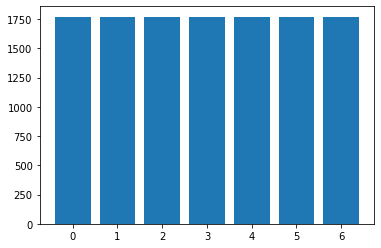

In [14]:
w=Counter(y)
plt.bar(w.keys(), w.values())

In [15]:
print(len(X))
print(len(y))

12397
12397


In [16]:
correct_mapping = {
    'lol':'lồn',
    'trog': 'trong',
    'ko': 'không',
    'hs': 'học sinh',
    'ne': 'nè',
    'chừ': 'giờ',
    'oto': 'ô tô',
    'mí': 'mới',
    'share': 'chia sẻ',
    'sgk': 'sách giáo khoa',
    'cv':'công việc',
    'kq':'kết quả',
    'mj': 'mày',
    'z':'vậy',
    'rụnng': 'rụng',
    'nhìu': 'nhiều',
    'ah': 'à',
    'k': 'không',
    'v': 'vậy',
    'àk': 'à',
    'ngulon': 'ngu lồn',
    'm': 'mày',
    'ks': 'khách sạn',
    'vkl':'vãi cả lồn',
    'dume': 'đụ mẹ',
    'fa': 'một mình',
    'nyc': ' người yêu cũ',
    'nge': 'nghe',
    'zi': 'vậy',
    't': 'tao',
    'boss': 'sếp',
    'of':'của',
    'immm': 'im',
    'volum':'âm lượng',
    'ghêeeee':'ghê',
    'crush':'người trong mộng',
    'gane':'trò chơi',
    'stt': 'trạng thái',
    'fải': 'phải',
    'vler':'vãi lồn',
    'pr':'quảng cáo',
    'ơiii':'ơi',
    'q.tâm':'quan tâm',
    'xxx': 'phim khiêu dâm',
    'tr': 'trời',
    'nta':'người ta',
    'thậc': 'thật',
    'chớt': 'chết',
    'lsao' : 'làm sao',
    'auto': 'tự động',
    'luônnn': 'luôn',
    'gym': "thể hình",
    'tml': 'thằng mặt lồn',
    'bằg':'bằng',
    'klq':'không liên quan',
    'ẻ': 'ỉa',
    'disss':'địt',
    'đmaaaa':'đụ má',
    'yêuu':'yêu',
    "g": 'gì',
    'or': 'hoặc',
    'yêuc': 'yêu',
    'zo': 'vào',
    'chờiiiii': 'trời',
    'tôiii':'tôi',
    's':'sao',
    'r': 'rồi',
    'thôiiii':'thôi',
    'dth':"dễ thương",
    'vớiiiiii' :'với',
    'zoe': 'dơ',
    'hlv':'huấn luyện viên',
    'lozzz': 'lồn',
    'đm':'đụ má',
    'lònnnnnnn':'lồn',
    'xanhhhh':'xanh',
    'saolol':'xạo lồn',
    'chaii':'chai',
    'ak':'à',
    'pk': 'biết',
    'iêu': 'yêu',
    'thíu': 'thiếu',
    'caphe': 'cà phê',
    'ukm': 'ừ',
    'hp': 'hạnh phúc',
    'tau':'tao',
    'ac':'anh chị',
    'q.q':'quần què',
    'lào': 'nào',
    'facebook':'mạng xã hội',
    'vcllll':'vãi cả lồn',
    'taooo': 'tao',
    'taoooo': 'tao',
    'video': 'đoạn phim',
    'make': 'làm',
    'in':'tại',
    'copy': 'sao chép',
    'sayy': 'nói',
    'ng': 'người',
    'goodbye': 'tạm biệt',
    'bcs': 'bao cao su',
    'chowi': 'chơi',
    'dlm': 'đụ mẹ',
    'cmnl': 'con mẹ nó luôn',
    'cc': 'con cặc',
    'showbiz':'giới giải trí',
    'yep':'vâng',
    'vl':'vãi lồn',
    'vlonee':'vãi lồn',
    'vclll':'vãi cả lồn',
    'tg':'tưởng',
    'cungc': 'cũng',
    'đờii': 'đời',
    'hmmmmmmm':'',
    'bn': 'bạn'
    
}

def check_acronyms(w):
    if w in correct_mapping:
        return correct_mapping[w]
    else:
        return w

In [17]:
def preprocessing(sent):
    sent=sent.lower()
    sent=re.findall(r'\b\S+\b',sent)
    sent = list(map(check_acronyms,sent))
    sent= ' '.join(sent)
    new_sent=ViTokenizer.tokenize(sent)
    return new_sent

In [18]:
for i in range(len(X)):
    X[i]=preprocessing(X[i])

In [19]:
X[:10]

['cho mình xin bài nhạc tên là gì với ạ',
 'một lí_do trong muôn_vàn lí_do',
 'trời nắng_nóng thế này mình muốn bán_nước không biết thu_nhập có cao không ạ 3',
 'bếp dầu nhiều nhà vẫn dùng',
 'nếu thấy phụ_nữ quá phức_tạp để hiểu và chinh_phục thì đây là cách giải_quyết vấn_đề',
 'thế con_trai là của ai cho',
 'đây người_ta gọi là khi đại_thánh_nhập hoặc là múa_lân đầu năm',
 'phải bồi_thường thiệt_hại bị trầy_xước thân tàu tiền sơn lại mấy toa tàu chắc cũng bộn',
 'thế em ăn cơm chưa',
 'thu trăm tỷ phạt 5tr lại qua tỉnh khác hành_nghề ha_ha']

In [20]:
def bi_gram(sent):
    sent=sent.split()
    dicti={}
    count=1
    for i in range(len(sent)):
        if sent[i] not in dicti:
            dicti[sent[i]]=1
        else:
            dicti[sent[i]]+=1
        if i != (len(sent)-1):
            bi_word= sent[i] + ' ' +sent[i+1]
            if len(bi_word)==1:
                continue
            else:
                if bi_word not in dicti:
                    dicti[bi_word]=1
                else:
                    dicti[bi_word]+=1
    return dicti

In [21]:
X_dict=[]
for i in X:
    X_dict.append(bi_gram(i))

In [22]:
X_dict[1]

{'một': 1,
 'một lí_do': 1,
 'lí_do': 2,
 'lí_do trong': 1,
 'trong': 1,
 'trong muôn_vàn': 1,
 'muôn_vàn': 1,
 'muôn_vàn lí_do': 1}

In [23]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)

x_train = vectorizer.fit_transform(X_dict)

In [24]:
filename='UIT-VSMEC/test_nor_811.xlsx'
data_test= pd.read_excel(filename,sheet_name='Sheet1')

In [25]:
data_test=data_test.drop('Unnamed: 0',axis=1)
data_test['Emotion'].replace({'Other':0,'Disgust':1,'Enjoyment':2,'Anger':3,'Surprise':4,'Sadness':5,'Fear':6},inplace=True)

In [26]:
X_test_dict=[]
y_test=data_test.Emotion
data_test['clean_sentence']=''
for i in range (0,len(data_test['Sentence'])):
    data_test['clean_sentence'][i]=preprocessing(data_test['Sentence'][i])
for i in data_test['clean_sentence']:
    X_test_dict.append(bi_gram(i))
x_test = vectorizer.transform(X_test_dict)


In [27]:
from sklearn import svm
from sklearn import metrics

svc = svm.SVC()
model=svc.fit(x_train,y)
y_pred = model.predict(x_test)
acc_svc=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.39      0.59      0.47       129
           1       0.50      0.39      0.43       132
           2       0.51      0.62      0.56       193
           3       0.29      0.17      0.22        40
           4       0.65      0.41      0.50        37
           5       0.59      0.45      0.51       116
           6       0.81      0.48      0.60        46

    accuracy                           0.49       693
   macro avg       0.54      0.44      0.47       693
weighted avg       0.51      0.49      0.49       693



In [28]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()

model=lsvc.fit(x_train,y)
y_pred = model.predict(x_test)
acc_linearsvc=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.43      0.45       129
           1       0.48      0.45      0.47       132
           2       0.57      0.65      0.60       193
           3       0.28      0.28      0.28        40
           4       0.59      0.51      0.55        37
           5       0.51      0.52      0.52       116
           6       0.74      0.63      0.68        46

    accuracy                           0.52       693
   macro avg       0.52      0.50      0.51       693
weighted avg       0.52      0.52      0.52       693



In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

model=rf.fit(x_train,y)
y_pred = model.predict(x_test)
acc_rf=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.46      0.43       129
           1       0.51      0.35      0.41       132
           2       0.50      0.61      0.55       193
           3       0.27      0.20      0.23        40
           4       0.70      0.38      0.49        37
           5       0.42      0.47      0.44       116
           6       0.69      0.59      0.64        46

    accuracy                           0.47       693
   macro avg       0.50      0.43      0.45       693
weighted avg       0.48      0.47      0.47       693



<BarContainer object of 3 artists>

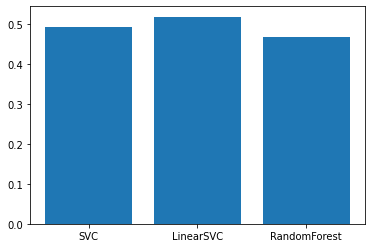

In [34]:
Acc={'SVC':acc_svc,'LinearSVC':acc_linearsvc,'RandomForest':acc_rf}
plt.bar(Acc.keys(), Acc.values())